# Analysis on Reported crime

In [5]:
%matplotlib inline
# importing required libraries
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [29]:
# getting abs path till raw data file
abs_path = os.getcwd()
path_array = abs_path.split("\\")
path_array = path_array[:len(path_array)-1]
homefolder_path = ""
for i in path_array[1:]:
    homefolder_path = homefolder_path + "/" + i
raw_data_path = homefolder_path + "/RawData/crime_dataset_india.csv"

raw_data_path

'/Users/YUGANK/DataAnalysis&Vis/RawData/crime_dataset_india.csv'

In [37]:
#reading csv into dataframe
df=pd.read_csv(raw_data_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         40160 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


### Graph for the top 10 Crime Cities with number of cases

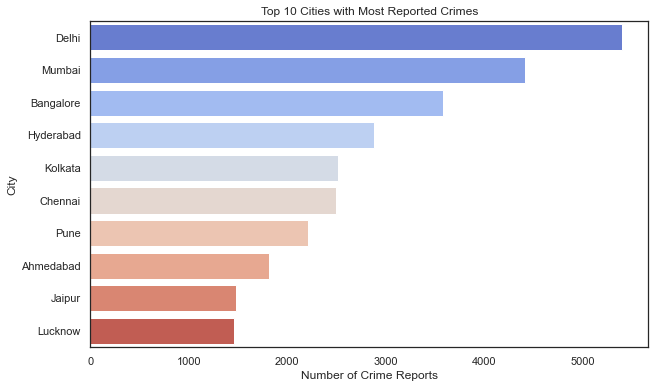

In [47]:
# Count the number of reports per city
city_crime_count = df['City'].value_counts().nlargest(10)

# Convert the Series to a DataFrame for better handling
top_cities_df = city_crime_count.reset_index()
top_cities_df.columns = ['City', 'Number of Reports']

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Reports', y='City', data=top_cities_df, palette='coolwarm')

# Adding titles and labels
plt.title('Top 10 Cities with Most Reported Crimes')
plt.xlabel('Number of Crime Reports')
plt.ylabel('City')

# Display plot
plt.show()


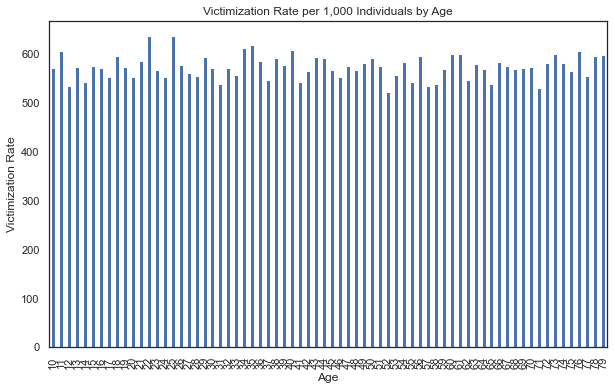

In [51]:
# Calculate the number of victims per age group
victim_counts = df['Victim Age'].value_counts().sort_index()

# Calculate the total number of individuals per age group in the population (if available)
# For demonstration, assume a uniform population distribution
population_counts = pd.Series([1000] * len(victim_counts), index=victim_counts.index)

# Calculate the victimization rate per 1,000 individuals
victimization_rate = (victim_counts / population_counts) * 1000

# Plot the victimization rate
plt.figure(figsize=(10, 6))
victimization_rate.plot(kind='bar')
plt.title('Victimization Rate per 1,000 Individuals by Age')
plt.xlabel('Age')
plt.ylabel('Victimization Rate')
plt.show()

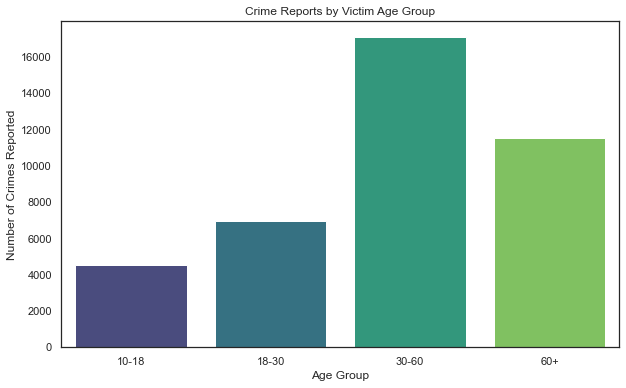

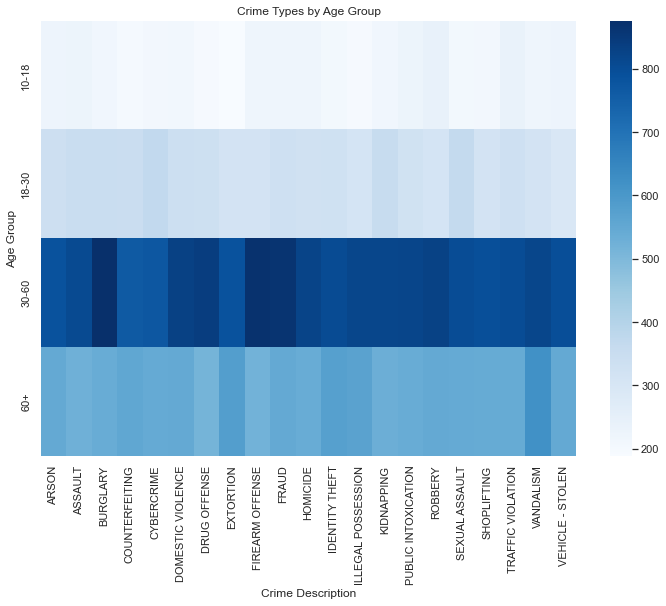

In [52]:
# Grouping victim ages into bins
age_bins = [10, 18, 30, 60, float('inf')]
age_labels = ['10-18', '18-30', '30-60', '60+']

# Create a new column 'Age Group' based on the bins
df['Age Group'] = pd.cut(df['Victim Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of crimes in each age group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Plot the distribution of crimes across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')

# Add titles and labels
plt.title('Crime Reports by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes Reported')

# Display the plot
plt.show()

# If you want to also analyze the crime types per age group:
age_group_crime = df.groupby(['Age Group', 'Crime Description']).size().unstack().fillna(0)

# Plot heatmap for crime types per age group
plt.figure(figsize=(12, 8))
sns.heatmap(age_group_crime, cmap='Blues', annot=False, fmt='d')
plt.title('Crime Types by Age Group')
plt.xlabel('Crime Description')
plt.ylabel('Age Group')
plt.show()